# A larger example

In [20]:
# Import required libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## The problem with the data set
We want a numerical value associated to each column, but we see strings/enums like [male,female], [yes, no], [southwest,southeast,...]

## The Solution
> One Hot Encoding

Here's how it works:

1. First, you create a list of all the possible fruits you want to represent. In our case, it would be apples, bananas, and oranges.

2. Next, you create a separate list for each fruit. Each list is the same length as the total number of possible fruits, and it's filled with zeros.

3. Now, when you want to represent a specific fruit, you find its corresponding list and change the zero at its position to a one. This "one" represents that this fruit is present, while all the other fruits remain at zero.

For example, if you want to represent an apple, you'd have a list like this:

Apples: [1, 0, 0]
Bananas: [0, 0, 0]
Oranges: [0, 0, 0]
If you want to represent a banana, it would look like this:

Apples: [0, 1, 0]
Bananas: [0, 0, 0]
Oranges: [0, 0, 0]
And for an orange:

Apples: [0, 0, 1]
Bananas: [0, 0, 0]
Oranges: [0, 0, 0]
This way, you can use these lists to show which fruits are present (with a "1") and which are not (with a "0"). It's like using a simple code to represent things you want to keep track of.

In [22]:
insurance_one_hot = pd.get_dummies(insurance)

insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [23]:
# Create features (X) and labels (Y)
X = insurance_one_hot.drop("charges", axis=1)

X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [24]:
Y = insurance_one_hot["charges"]

Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Recall 
80% training data, 20% testing data

This time we'll use a module to do it for us rather than do it ourselves

In [25]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = tf.constant(X_train, dtype=tf.float32)
Y_train = tf.constant(Y_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
Y_test = tf.constant(Y_test, dtype=tf.float32)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

# Build a neural network (sort of like [model_2](./regression_1.ipynb) )

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100


34/34 [==============================] - 1s 1ms/step - loss: 8616.1572 - mae: 8616.1572
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7874.9897 - mae: 7874.9897
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7586.7700 - mae: 7586.7700
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9956 - mae: 7735.9956
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7693.7002 - mae: 7693.7002
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7643.8271 - mae: 7643.8271
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7506.9844 - mae: 7506.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7788.3721 - mae: 7788.3721
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7607.8359 - mae: 7607.8359
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7680.8149 - mae: 7680.8149
Epoch 11/10

In [27]:
model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7273.5708 - mae: 7273.5708


[7273.57080078125, 7273.57080078125]

# It's Shit!
It's off by 7000 everywhere! That aint gonna fly so now we gotta make it better with techniques we learnt in the last nb
* ~~Add data~~
* More layers
* Train longer

In [30]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

model_2.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13303.8291 - mae: 13303.8291
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13173.3916 - mae: 13173.3916
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12890.5029 - mae: 12890.5029
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12306.7930 - mae: 12306.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11259.6758 - mae: 11259.6758
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9754.8828 - mae: 9754.8828
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8237.8643 - mae: 8237.8643
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7449.1255 - mae: 7449.1255
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7327.1577 - mae: 7327.1577
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7311.3315 - mae:

In [37]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

history = model_3.fit(X_train, Y_train, epochs=150, verbose=1)

Epoch 1/150
34/34 [==============================] - 1s 1ms/step - loss: 13278.0400 - mae: 13278.0400
Epoch 2/150
34/34 [==============================] - 0s 1ms/step - loss: 13117.5215 - mae: 13117.5215
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 12789.9229 - mae: 12789.9229
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 12149.4502 - mae: 12149.4502
Epoch 5/150
34/34 [==============================] - 0s 1ms/step - loss: 11063.4453 - mae: 11063.4453
Epoch 6/150
34/34 [==============================] - 0s 1ms/step - loss: 9634.2227 - mae: 9634.2227
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 8278.7168 - mae: 8278.7168
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 7563.6138 - mae: 7563.6138
Epoch 9/150
34/34 [==============================] - 0s 1ms/step - loss: 7430.6909 - mae: 7430.6909
Epoch 10/150
34/34 [==============================] - 0s 1ms/step - loss: 7409.6431 - mae:

In [38]:
model_3.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3618.3613 - mae: 3618.3613


[3618.361328125, 3618.361328125]

Text(0.5, 0, 'epochs')

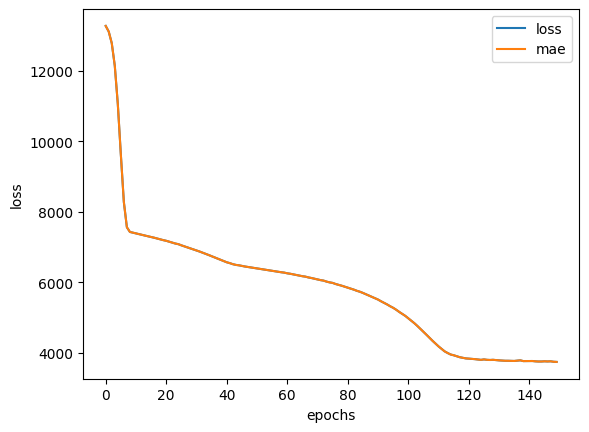

In [39]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# 🧐 How long to train for?
> It depends. Though, TensorFlow does have something that can help, called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). 

# Preprocessing Data (normalization and standardization): b/w 0 & 1

In terms of scaling values, neural networks prefer normalization

If unsure, do both and see which performs better.

[Read More](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

<Axes: ylabel='Frequency'>

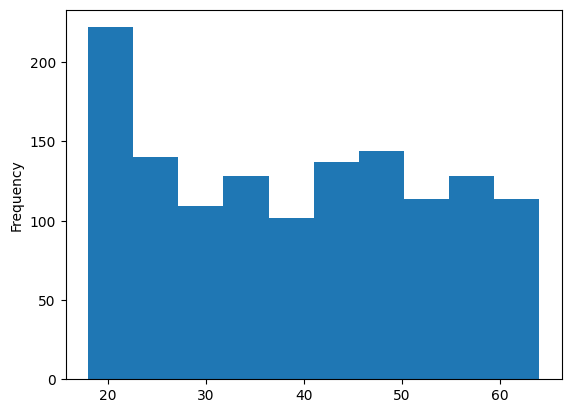

In [40]:

X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

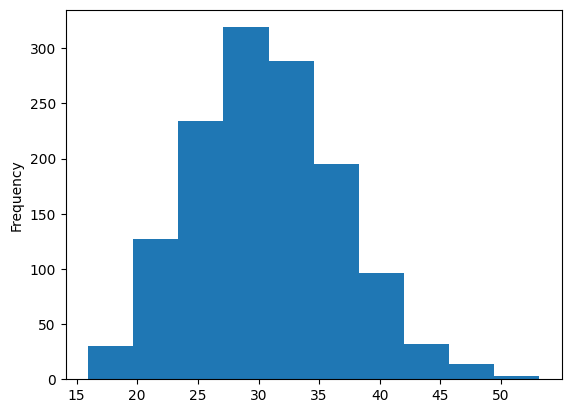

In [41]:
X["bmi"].plot(kind="hist")

<Axes: ylabel='Frequency'>

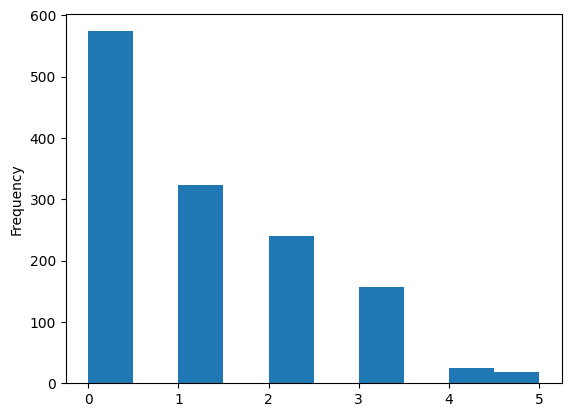

In [42]:
X["children"].plot(kind="hist")

> To prepare our data, we are gonna borrow a few classes from scikit-learn

In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all vals in these columns to exist b/w 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
) 

# Recreate data sets 
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

print(X_train.loc[0])
print(X_train_normal[0])
X_train = tf.constant(X_train_normal, dtype=tf.float32)
Y_train = tf.constant(Y_train, dtype=tf.float32)
X_test = tf.constant(X_test_normal, dtype=tf.float32)
Y_test = tf.constant(Y_test, dtype=tf.float32)


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object
[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]


Our data has been normalized and one hot encoded! Now let's build a new model and see if it outperforms the previous one.

In [47]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

history_4 = model_4.fit(X_train_normal, Y_train, epochs=150, verbose=1)

Epoch 1/150
34/34 [==============================] - 0s 2ms/step - loss: 13343.0645 - mae: 13343.0645
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 13333.6055 - mae: 13333.6055
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 13310.6377 - mae: 13310.6377
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 13263.7090 - mae: 13263.7090
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 13181.6875 - mae: 13181.6875
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: 13053.7168 - mae: 13053.7168
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 12869.7549 - mae: 12869.7549
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 12619.8037 - mae: 12619.8037
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: 12293.6826 - mae: 12293.6826
Epoch 10/150
34/34 [==============================] - 0s 1ms/step - loss: 11888.29

In [53]:
model_4.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3291.4189 - mae: 3291.4189


[3291.4189453125, 3291.4189453125]

Text(0.5, 0, 'epochs')

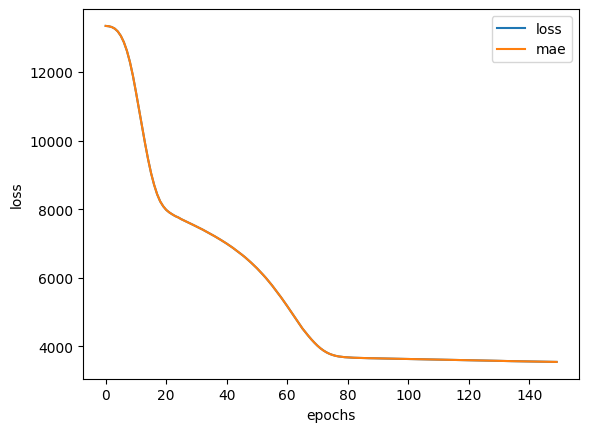

In [49]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# 🥳 Regression basics completed!

![Alt text](./assets/celebrate.png)